In [1]:
import pandas as pd

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605,210612,210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828] # 3 last months
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [4]:
turnstiles_df.shape #shape before filtring 

(2722610, 11)

In [5]:
turnstiles_df['TIME'].value_counts()#to check if there are any time that is not 00:00:00,04:00:00,08:00:00,12:00:00, and turnstiles_df['TIME'].value_counts()#to check if there are any time that is not 00:00:00,04:00:00,08:00:00,12:00:00, and 


00:00:00    233191
04:00:00    233185
08:00:00    233165
12:00:00    233131
16:00:00    233074
             ...  
21:36:42         1
02:45:20         1
10:28:28         1
08:02:30         1
23:40:50         1
Name: TIME, Length: 53976, dtype: int64

In [6]:
df = turnstiles_df.loc[turnstiles_df['TIME'].isin(["08:00:00", "12:00:00" ])] 
#so I chose 8 AM because it has the cumulative number of exits at 7-8 o'clock 
#Also I chose 12 AM because it has the cumulative number of exits at 8-9 o'clock 

In [7]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/31/2021,08:00:00,REGULAR,7579321,2590573


In [8]:
df['TIME'].value_counts() # for checking

08:00:00    233165
12:00:00    233131
Name: TIME, dtype: int64

In [9]:
df.shape # for checking

(466296, 11)

In [10]:
df.isna().sum()# for checking

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [11]:
df.head(5) # for checking

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/31/2021,08:00:00,REGULAR,7579321,2590573


In [12]:
df.info() # for checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466296 entries, 2 to 208352
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   466296 non-null  object
 1   UNIT                                                                  466296 non-null  object
 2   SCP                                                                   466296 non-null  object
 3   STATION                                                               466296 non-null  object
 4   LINENAME                                                              466296 non-null  object
 5   DIVISION                                                              466296 non-null  object
 6   DATE                                                                  466296 non-null  objec

In [13]:
df.columns # for checking

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [14]:
df.columns = [column.strip() for column in df.columns]
# striping 

In [15]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [16]:
df_daily = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False).EXITS.first()

In [17]:
df_daily[["PREV_EXITS"]] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["EXITS"].apply(lambda grp: grp.shift(1)))

In [18]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2590340,NaN
1,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2590386,2590340.0
2,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,2590454,2590386.0
3,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,2590493,2590454.0
4,A002,R051,02-00-00,59 ST,05/31/2021,08:00:00,2590573,2590493.0


In [19]:
df_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS
466283,S101A,R070,01-05-01,ST. GEORGE,08/25/2021,12:00:00,0,0.0
466284,S101A,R070,01-05-01,ST. GEORGE,08/26/2021,08:00:00,0,0.0
466285,S101A,R070,01-05-01,ST. GEORGE,08/26/2021,12:00:00,0,0.0
466286,S101A,R070,01-05-01,ST. GEORGE,08/27/2021,08:00:00,0,0.0
466287,S101A,R070,01-05-01,ST. GEORGE,08/27/2021,12:00:00,0,0.0


In [20]:
df_daily[df_daily["EXITS"] < df_daily["PREV_EXITS"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         181
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
B012  R196  00-00-00  PROSPECT PARK      181
C025  R215  00-05-01  86 ST                1
                                        ... 
R612  R057  01-05-00  ATL AV-BARCLAY       1
R621  R060  00-06-00  EASTN PKWY-MUSM      1
R622  R123  00-00-00  FRANKLIN AV        181
R633  R068  00-00-01  VAN SICLEN AV        1
R728  R226  00-05-01  GUN HILL RD          1
Length: 65, dtype: int64

In [21]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

268473354 1082703.0
0 2004698.0
14090469 225.0
7 1502424.0
1174467459 4612076.0
4 1671271.0
17 6525430.0
540 8944327.0
99 2974479.0
579 16055255.0
156 1875745997.0
111 1957476.0
63 1885666.0
32 236191029.0
788 9251140.0
6714230 2117913.0
1001 2363688.0
44 11825444.0
0 134263112.0
229 2490084.0


In [22]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["EXITS2"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
df_daily = df_daily[(df_daily.EXITS2!=0)&(df_daily.PREV_EXITS!=0)]
df_daily

268473354 1082703.0
0 2004698.0
14090469 225.0
7 1502424.0
1174467459 4612076.0
4 1671271.0
17 6525430.0
540 8944327.0
99 2974479.0
579 16055255.0
156 1875745997.0
111 1957476.0
63 1885666.0
32 236191029.0
788 9251140.0
6714230 2117913.0
1001 2363688.0
44 11825444.0
0 134263112.0
229 2490084.0


,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2
0,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2590340,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2590386,2590340.0,46.0
2,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,2590454,2590386.0,68.0
3,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,2590493,2590454.0,39.0
4,A002,R051,02-00-00,59 ST,05/31/2021,08:00:00,2590573,2590493.0,80.0
...,...,...,...,...,...,...,...,...,...
465388,S101A,R070,01-03-00,ST. GEORGE,06/02/2021,12:00:00,381,378.0,3.0
465561,S101A,R070,01-03-01,ST. GEORGE,05/29/2021,08:00:00,296,NaN,NaN
465743,S101A,R070,01-03-02,ST. GEORGE,05/29/2021,08:00:00,86,NaN,NaN
465925,S101A,R070,01-05-00,ST. GEORGE,05/29/2021,08:00:00,0,NaN,NaN


In [23]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2
0,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2590340,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2590386,2590340.0,46.0
2,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,2590454,2590386.0,68.0
3,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,2590493,2590454.0,39.0
4,A002,R051,02-00-00,59 ST,05/31/2021,08:00:00,2590573,2590493.0,80.0


In [24]:
df_daily['Num_of_EXITS_in_1_hour'] = df_daily['EXITS2']/4 
# I divided the exits by 4 because the number of exits for every 4 hours
#So that I can know approximately how many people leave the station at 7-8 and 8-9

In [25]:
df_daily.sort_values('EXITS2', ascending=False) #sort it descending to know which station has the most exits

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2,Num_of_EXITS_in_1_hour
259302,N510,R163,02-00-02,14 ST,08/12/2021,12:00:00,36,767349.0,767313.0,191828.25
430875,R604,R108,03-00-05,BOROUGH HALL,06/03/2021,08:00:00,161,698543.0,698382.0,174595.50
132416,N063,R011,02-00-04,42 ST-PORT AUTH,06/27/2021,08:00:00,128,561847.0,561719.0,140429.75
253884,N506,R022,00-05-04,34 ST-HERALD SQ,06/03/2021,12:00:00,0,547709.0,547709.0,136927.25
138800,N068,R012,03-00-02,34 ST-PENN STA,07/15/2021,08:00:00,3905,494213.0,490308.0,122577.00
...,...,...,...,...,...,...,...,...,...,...
465379,S101A,R070,01-03-00,ST. GEORGE,05/29/2021,08:00:00,378,NaN,NaN,NaN
465561,S101A,R070,01-03-01,ST. GEORGE,05/29/2021,08:00:00,296,NaN,NaN,NaN
465743,S101A,R070,01-03-02,ST. GEORGE,05/29/2021,08:00:00,86,NaN,NaN,NaN
465925,S101A,R070,01-05-00,ST. GEORGE,05/29/2021,08:00:00,0,NaN,NaN,NaN


In [26]:
df_daily['datetime'] = pd.to_datetime(df_daily.DATE+' '+df_daily.TIME)

In [27]:
df_daily['day_of_week'] = df_daily['datetime'].apply(lambda x : x.weekday())

In [28]:
df_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2,Num_of_EXITS_in_1_hour,datetime,day_of_week
0,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2590340,NaN,NaN,NaN,2021-05-29 08:00:00,5
1,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2590386,2590340.0,46.0,11.50,2021-05-29 12:00:00,5
2,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,2590454,2590386.0,68.0,17.00,2021-05-30 08:00:00,6
3,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,2590493,2590454.0,39.0,9.75,2021-05-30 12:00:00,6
4,A002,R051,02-00-00,59 ST,05/31/2021,08:00:00,2590573,2590493.0,80.0,20.00,2021-05-31 08:00:00,0
5,A002,R051,02-00-00,59 ST,05/31/2021,12:00:00,2590614,2590573.0,41.0,10.25,2021-05-31 12:00:00,0
6,A002,R051,02-00-00,59 ST,06/01/2021,08:00:00,2590716,2590614.0,102.0,25.50,2021-06-01 08:00:00,1
7,A002,R051,02-00-00,59 ST,06/01/2021,12:00:00,2590840,2590716.0,124.0,31.00,2021-06-01 12:00:00,1
8,A002,R051,02-00-00,59 ST,06/02/2021,08:00:00,2590974,2590840.0,134.0,33.50,2021-06-02 08:00:00,2
9,A002,R051,02-00-00,59 ST,06/02/2021,12:00:00,2591115,2590974.0,141.0,35.25,2021-06-02 12:00:00,2


In [29]:
def weeks(x):
    if x >= 5:
        return "Weekend"
    else: 
        return "Weekday"
    
df_daily["weekday_OR_weekend"] = df_daily['day_of_week'].apply(lambda x : weeks(x))

In [30]:
df_daily.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2,Num_of_EXITS_in_1_hour,datetime,day_of_week,weekday_OR_weekend
0,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2590340,NaN,NaN,NaN,2021-05-29 08:00:00,5,Weekend
1,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2590386,2590340.0,46.0,11.50,2021-05-29 12:00:00,5,Weekend
2,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,2590454,2590386.0,68.0,17.00,2021-05-30 08:00:00,6,Weekend
3,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,2590493,2590454.0,39.0,9.75,2021-05-30 12:00:00,6,Weekend
4,A002,R051,02-00-00,59 ST,05/31/2021,08:00:00,2590573,2590493.0,80.0,20.00,2021-05-31 08:00:00,0,Weekday


In [31]:
df_daily = df_daily.loc[df_daily['weekday_OR_weekend'].isin(["Weekday" ])]

In [32]:
df_daily.sort_values("DATE",ascending=False)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,EXITS2,Num_of_EXITS_in_1_hour,datetime,day_of_week,weekday_OR_weekend
202458,N315,R238,00-00-02,STEINWAY ST,08/27/2021,08:00:00,3539839,3539322.0,517.0,129.25,2021-08-27 08:00:00,4,Weekday
429599,R602,R108,00-03-01,BOROUGH HALL,08/27/2021,08:00:00,2836614,2836278.0,336.0,84.00,2021-08-27 08:00:00,4,Weekday
320122,R174,R034,00-00-02,125 ST,08/27/2021,12:00:00,9530035,9529859.0,176.0,44.00,2021-08-27 12:00:00,4,Weekday
221702,N340,R115,00-00-04,169 ST,08/27/2021,12:00:00,751222,751160.0,62.0,15.50,2021-08-27 12:00:00,4,Weekday
221701,N340,R115,00-00-04,169 ST,08/27/2021,08:00:00,751160,750779.0,381.0,95.25,2021-08-27 08:00:00,4,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133454,N063A,R011,00-00-00,42 ST-PORT AUTH,05/31/2021,08:00:00,9448518,9447016.0,1502.0,375.50,2021-05-31 08:00:00,0,Weekday
133455,N063A,R011,00-00-00,42 ST-PORT AUTH,05/31/2021,12:00:00,9448928,9448518.0,410.0,102.50,2021-05-31 12:00:00,0,Weekday
311230,R147,R033,04-00-04,TIMES SQ-42 ST,05/31/2021,12:00:00,8302838,8302710.0,128.0,32.00,2021-05-31 12:00:00,0,Weekday
311229,R147,R033,04-00-04,TIMES SQ-42 ST,05/31/2021,08:00:00,8302710,8302275.0,435.0,108.75,2021-05-31 08:00:00,0,Weekday


In [33]:
# to sum number of EXITS in one hour coluns for each (C/A, UNIT, SCP, STATION) to find the num of exits at 7-9 AM
df_daily3 = df_daily.groupby(["C/A","UNIT","SCP","STATION","DATE"]).Num_of_EXITS_in_1_hour.sum().reset_index()
df_daily3 =  df_daily3.sort_values("Num_of_EXITS_in_1_hour",ascending=False)
df_daily3 = df_daily3.head(10)
df_daily3

,C/A,UNIT,SCP,STATION,DATE,Num_of_EXITS_in_1_hour
84035,N510,R163,02-00-02,14 ST,08/12/2021,191840.50
139400,R604,R108,03-00-05,BOROUGH HALL,06/03/2021,174626.25
82219,N506,R022,00-05-04,34 ST-HERALD SQ,06/03/2021,137251.25
44854,N068,R012,03-00-02,34 ST-PENN STA,07/15/2021,122592.00
98374,R137,R031,02-03-00,34 ST-PENN STA,08/23/2021,105794.75
66635,N325A,R218,00-00-00,ELMHURST AV,07/27/2021,104007.25
132474,R526,R096,00-05-03,82 ST-JACKSON H,06/30/2021,98967.25
57704,N137,R354,00-00-00,104 ST,06/29/2021,79800.50
103591,R177,R273,01-00-01,145 ST,07/16/2021,48943.50
42589,N063,R011,02-00-00,42 ST-PORT AUTH,08/20/2021,38088.00


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt 

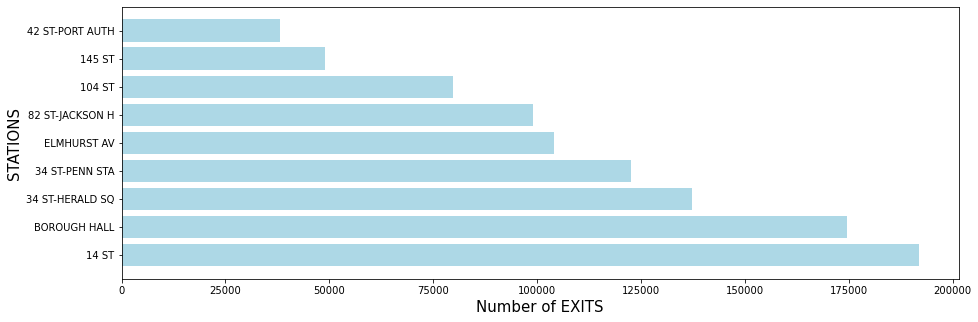

In [35]:
plt.figure(figsize=(15,5))
# x is a list that contains 10 stations that have the most exits
x = ["14 ST","BOROUGH HALL","34 ST-HERALD SQ","34 ST-PENN STA","34 ST-PENN STA","ELMHURST AV","82 ST-JACKSON H","104 ST","145 ST","42 ST-PORT AUTH"]
plt.barh(x ,df_daily3["Num_of_EXITS_in_1_hour"],color='lightblue')
plt.xlabel("Number of EXITS",fontsize = 15)
plt.ylabel("STATIONS",fontsize = 15)
plt.savefig("output.jpg")
# 14 ST is the station with the most number of exits at 7-9